In [47]:
from Bio import Phylo
import matplotlib
#import imp
tree = Phylo.read("ant_OR_Zhou_newick_format_tree.txt", "newick")

In [48]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.08128226, name='NvOr1')
        Clade(branch_length=0.03953197, confidence=39)
            Clade(branch_length=0.0950781, name='AmOr2')
            Clade(branch_length=0.11247075, confidence=78)
                Clade(branch_length=0.02250818, name='HsOrco')
                Clade(branch_length=0.01197314, confidence=65)
                    Clade(branch_length=0.01408621, name='PbOr1')
                    Clade(branch_length=0.00592873, confidence=45)
                        Clade(branch_length=0.00854296, name='CfOrco')
                        Clade(branch_length=0.03676804, name='LhOr1JF')
        Clade(branch_length=1.31753257, confidence=100)
            Clade(branch_length=1.32861791, confidence=100)
                Clade(branch_length=0.45116424, name='LhOr59')
                Clade(branch_length=0.23903436, confidence=30)
                    Clade(branch_length=0.07097824, confidence=67)
                     

In [49]:
Phylo.draw_ascii(tree)

 , NvOr1
 |
 , AmOr2
 |
 |, HsOrco
 ||
 |, PbOr1
 ||
 |, CfOrco
 ||
 || LhOr1JF
 |
 |                             ____ LhOr59
 |                            |
 |                            |   __ CfOr198
 |                            |  |
 |                            |  |__ PbOr175
 |              ______________|  |
 |             |              |  | ____ HsOr205
 |             |              |  ||
 |             |              |  ,|     __ PbOr165CTE
 |             |              |  ||  __|
 |             |              |__|| |  |_ PbOr166
 |             |                 ||_|
 |             |                 |  | __ CfOr192
 |             |                 |  ||
 |             |                 |   , PbOr163
 |             |                 |   |
 |             |                 |   |_ LhOr47FIX
 |             |                 |   |
 |             |                 |   |_ HsOr202
 |             |                 |
 |             |                 | _ PbOr173
 |             |        

                                         |||____|
                                         ||     |, HsOr131
                                         ,|     ||
                                         ||      , HsOr167
                                         ||      |
                                         ||      | HsOr168
                                         ||
                                         || _ HsOr134
                                         |||
                                         | |, PbOr129JF
                                         | ||
                                         |  |__ LhOr101
                                         |  |
                                         |  | __ CfOr157
                                         |  ||
                                         |   |_ CfOr156
                                         |   |
                                         |   |, CfOr154
                                         |   ||
             

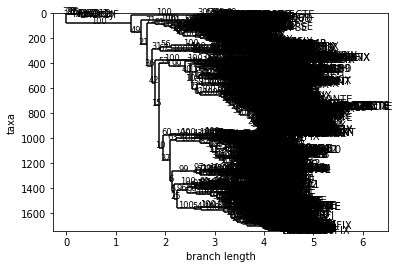

In [50]:
tree.rooted = True
Phylo.draw(tree)

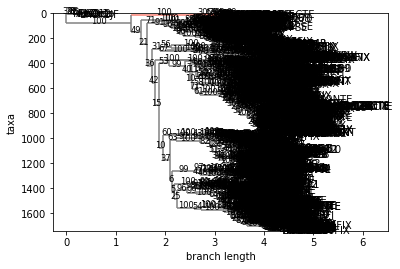

In [17]:
tree = tree.as_phyloxml()
tree.root.color = (128, 128, 128)
mrca = tree.common_ancestor({"name": "PbOr170"}, {"name": "LhOr59"})
mrca.color = "salmon"
#tree.clade[0, 1].color = "blue"
Phylo.draw(tree)

In [25]:
def get_parent(tree, child_clade):
    node_path = tree.get_path(child_clade)
    return node_path[-2]

# Select a clade
myclade = next(tree.find_clades("PbOr170"))
# Test the function
parent = get_parent(tree, myclade)
assert myclade in parent

In [22]:
print(parent)

Clade


In [27]:
def all_parents(tree):
    parents = {}
    for clade in tree.find_clades(order='level'):
        for child in clade:
            parents[child] = clade
    return parents

# Example
parents = all_parents(tree)
myclade = next(tree.find_clades("PbOr170"))
parent_of_myclade = parents[myclade]
assert myclade in parent_of_myclade

In [28]:
print(parent_of_myclade)

Clade


In [33]:
def lookup_by_names(tree):
    names = {}
    for clade in tree.find_clades():
        if clade.name:
            if clade.name in names:
                raise ValueError("Duplicate key: %s" % clade.name)
            names[clade.name] = clade
    return names

In [36]:
#tree = Phylo.read('ncbi_taxonomy.xml', 'phyloxml')
names = lookup_by_names(tree)
#for phylum in ('Apicomplexa', 'Euglenozoa', 'Fungi'):
#    print ("Phylum size: %d" %
#           len(names[phylum].get_terminals()))
print(names)

{'NvOr1': Clade(branch_length=0.08128226, name='NvOr1'), 'AmOr2': Clade(branch_length=0.0950781, name='AmOr2'), 'HsOrco': Clade(branch_length=0.02250818, name='HsOrco'), 'PbOr1': Clade(branch_length=0.01408621, name='PbOr1'), 'CfOrco': Clade(branch_length=0.00854296, name='CfOrco'), 'LhOr1JF': Clade(branch_length=0.03676804, name='LhOr1JF'), 'LhOr59': Clade(branch_length=0.45116424, name='LhOr59'), 'CfOr198': Clade(branch_length=0.27342524, name='CfOr198'), 'PbOr175': Clade(branch_length=0.193427, name='PbOr175'), 'HsOr205': Clade(branch_length=0.43801621, name='HsOr205'), 'PbOr165CTE': Clade(branch_length=0.217221, name='PbOr165CTE'), 'PbOr166': Clade(branch_length=0.13600108, name='PbOr166'), 'CfOr192': Clade(branch_length=0.25851297, name='CfOr192'), 'PbOr163': Clade(branch_length=0.10926406, name='PbOr163'), 'LhOr47FIX': Clade(branch_length=0.12497226, name='LhOr47FIX'), 'HsOr202': Clade(branch_length=0.18694917, name='HsOr202'), 'PbOr173': Clade(branch_length=0.21907559, name='PbO

In [51]:
mrca = tree.common_ancestor({"name": "PbOr170"}, {"name": "LhOr59"})

In [53]:
tree.get_terminals()

[Clade(branch_length=0.08128226, name='NvOr1'),
 Clade(branch_length=0.0950781, name='AmOr2'),
 Clade(branch_length=0.02250818, name='HsOrco'),
 Clade(branch_length=0.01408621, name='PbOr1'),
 Clade(branch_length=0.00854296, name='CfOrco'),
 Clade(branch_length=0.03676804, name='LhOr1JF'),
 Clade(branch_length=0.45116424, name='LhOr59'),
 Clade(branch_length=0.27342524, name='CfOr198'),
 Clade(branch_length=0.193427, name='PbOr175'),
 Clade(branch_length=0.43801621, name='HsOr205'),
 Clade(branch_length=0.217221, name='PbOr165CTE'),
 Clade(branch_length=0.13600108, name='PbOr166'),
 Clade(branch_length=0.25851297, name='CfOr192'),
 Clade(branch_length=0.10926406, name='PbOr163'),
 Clade(branch_length=0.12497226, name='LhOr47FIX'),
 Clade(branch_length=0.18694917, name='HsOr202'),
 Clade(branch_length=0.21907559, name='PbOr173'),
 Clade(branch_length=0.18214679, name='LhOr58'),
 Clade(branch_length=0.15573244, name='LhOr57'),
 Clade(branch_length=0.10178697, name='PbOr172'),
 Clade(bran

In [55]:
#tree.get_nonterminals()

[Clade(),
 Clade(branch_length=0.03953197, confidence=39),
 Clade(branch_length=0.11247075, confidence=78),
 Clade(branch_length=0.01197314, confidence=65),
 Clade(branch_length=0.00592873, confidence=45),
 Clade(branch_length=1.31753257, confidence=100),
 Clade(branch_length=1.32861791, confidence=100),
 Clade(branch_length=0.23903436, confidence=30),
 Clade(branch_length=0.07097824, confidence=67),
 Clade(branch_length=0.06808209, confidence=16),
 Clade(branch_length=0.05587721, confidence=22),
 Clade(branch_length=0.18505444, confidence=95),
 Clade(branch_length=0.28529852, confidence=99),
 Clade(branch_length=0.05161639, confidence=68),
 Clade(branch_length=0.02359982, confidence=14),
 Clade(branch_length=0.03908886, confidence=29),
 Clade(branch_length=0.03324154, confidence=3),
 Clade(branch_length=0.04948974, confidence=9),
 Clade(branch_length=0.10280977, confidence=85),
 Clade(branch_length=0.04753704, confidence=72),
 Clade(branch_length=0.02680967, confidence=44),
 Clade(bra

In [72]:
cladeA=mrca.get_terminals()
#print(len(cladeA))

48


In [75]:
clade_A=[]
for i in range(0,len(cladeA)):
    clade_A.append(cladeA[i].name)
    #print(cladeA[i].name)
print(clade_A)


['LhOr59', 'CfOr198', 'PbOr175', 'HsOr205', 'PbOr165CTE', 'PbOr166', 'CfOr192', 'PbOr163', 'LhOr47FIX', 'HsOr202', 'PbOr173', 'LhOr58', 'LhOr57', 'PbOr172', 'CfOr197', 'HsOr192', 'HsOr193', 'HsOr206', 'HsOr207', 'HsOr208', 'PbOr168', 'CfOr199', 'LhOr50', 'LhOr51', 'HsOr201', 'LhOr48', 'PbOr164FIX', 'LhOr49', 'PbOr167', 'HsOr199', 'AmOr169', 'AmOr168', 'AmOr170', 'HsOr194', 'CfOr196', 'LhOr54', 'LhOr56', 'HsOr200', 'HsOr197', 'HsOr196', 'HsOr195', 'HsOr198', 'LhOr55', 'CfOr193', 'LhOr52', 'CfOr195', 'CfOr194', 'PbOr170']


In [89]:
def clade_siblings(relative1,relative2,clade_name):
    mcra=tree.common_ancestor({"name":"%s"%relative1},{"name":"%s"%relative2})
    clade_name=[]
    clade_of_interest=mcra.get_terminals()

    for i in range(0,len(clade_of_interest)):
        clade_name.append(clade_of_interest[i].name)
    return(clade_name)

In [90]:
#mrca = tree.common_ancestor({"name": "HsOr188"}, {"name": "LhOr210"})
print(clade_siblings("HsOr188","LhOr210","Clade_B"))
clade_B=clade_siblings("HsOr188","LhOr210","Clade_B")

['HsOr188', 'CfOr188', 'PbOr151', 'AmOr119', 'LhOr210']


In [92]:
clade_C=clade_siblings("AmOr116","HsOr219","Clade_C")
print(clade_C)

['AmOr116', 'CfOr217', 'PbOr197', 'LhOr224', 'HsOr219']


In [93]:
clade_D=clade_siblings("CfOr262","NvOr121PSE","Clade_D")
print(clade_D)

['NvOr121PSE', 'NvOr122', 'NvOr125', 'NvOr118', 'NvOr117', 'NvOr119', 'NvOr124', 'NvOr126', 'NvOr127INT', 'NvOr128', 'LhOr227', 'LhOr228', 'HsOr181', 'PbOr227', 'HsOr183', 'HsOr182', 'PbOr229', 'CfOr263', 'LhOr229', 'LhOr231', 'CfOr258', 'PbOr230', 'LhOr230', 'CfOr259', 'CfOr261', 'CfOr262']


In [94]:
clade_E=clade_siblings("NvOr80","LhOr135","Clade_E")
print(clade_E)

['NvOr80', 'NvOr98', 'NvOr103', 'NvOr105', 'NvOr99', 'NvOr100', 'NvOr102', 'NvOr101', 'NvOr113', 'NvOr114', 'NvOr115', 'NvOr112PSE', 'NvOr106', 'NvOr108PSE', 'NvOr109PSE', 'NvOr107', 'NvOr111', 'NvOr110', 'NvOr93', 'NvOr90PSE', 'NvOr94', 'NvOr92', 'NvOr96', 'NvOr84INT', 'NvOr85', 'NvOr97CTE', 'NvOr87', 'NvOr86', 'NvOr88', 'NvOr89', 'AmOr73', 'CfOr218', 'LhOr225', 'PbOr198FIX', 'PbOr199FIX', 'PbOr200', 'PbOr201', 'LhOr226', 'HsOr242', 'HsOr240', 'HsOr241', 'CfOr231', 'CfOr229', 'CfOr230', 'CfOr232', 'NvOr82', 'NvOr81', 'LhOr138', 'LhOr137', 'HsOr239', 'LhOr139', 'PbOr202FIX', 'CfOr233', 'CfOr251', 'CfOr234', 'CfOr250', 'HsOr235', 'HsOr234', 'HsOr236', 'HsOr238', 'CfOr257', 'HsOr226', 'HsOr227', 'HsOr237', 'HsOr230', 'HsOr231', 'HsOr228', 'HsOr229', 'HsOr232', 'HsOr233', 'PbOr206FIX', 'CfOr255', 'CfOr249', 'LhOr140FIX', 'CfOr252', 'PbOr203', 'CfOr254', 'LhOr142', 'LhOr141', 'PbOr207', 'LhOr145', 'LhOr143', 'LhOr144', 'AmOr70', 'AmOr71', 'AmOr72', 'AmOr68', 'AmOr69', 'LhOr123FIX', 'CfOr24

In [105]:
#loop through a list and make the clades in alphabelical order
#call clade_siblings
ant_clades={
    "Clade_A": ["PbOr170","LhOr59"],
    "Clade_B": ["HsOr188","LhOr210"],
    "Clade_C": ["AmOr116", "HsOr219"],
    "Clade_D": ["NvOr121PSE", "CfOr262"],
    "Clade_E": ["NvOr98","LhOr135"],
    "Clade_F": ["AmOr171","NvOr263"],
    "Clade_G": ["NvOr45","PbOr195JF"],
    "Clade_H": ["NvOr44","PbOr190FIX"],
    "Clade_I": ["NvOr296","PbOr145"],
    "Clade_J": ["PbOr154","AmOr84"],
    "Clade_K": ["AmOr1","PbOr3"],
    "Clade_L": ["NvOr8","PbOr12"],
    "Clade_M": ["LhOr146","PbOr56FIX"],
    "Clade_N": ["NvOr61","LhOr155"],
    "Clade_O": ["NvOr60","CfOr52"],
    "Clade_P": ["AmOr65","CfOr101"],
    "Clade_Q": ["AmOr160","HsOr187"],
    "Clade_R": ["HsOr179","LhOr207"],
    "Clade_S": ["PbOr149", "NvOr288"],
    "Clade_T": ["NvOr25", "HsOr86"],
    "Clade_U": ["NvOr38", "LhOr180FN"],
    "Clade_V": ["NvOr64","HsOr127"]
}
def make_clade_lists(clade_dict):
    
    for key,value in clade_dict.items():
        clade_name="clade_"+key.split("_")[1]
        clade_siblings(value[0],value[1],key)
        #print(clade_name)
        #clade_siblings(value[0],value[1],key)
make_clade_lists(ant_clades)
        
    


SyntaxError: can't assign to operator (<ipython-input-105-0db8b17c9328>, line 30)

In [ ]:
#create a second tree

In [ ]:
#loop through the clades of second tree

In [ ]:
#compare the members of each clade
    #extract the ants from each clade 
        #see if the ants are in both lists
            #percentage that is in both
    #return the percent matching that is in each clade